# US January Flight Delay Prediction


***
- Created a classification model (f1 score: 0.75 & accuracy score: 0.94) to predict whether a flight would delay or not based on features including distance, departure airports, arrival airports and etc.

- Utilized 1.19 million pieces of flight information to build the model and conduct analysis.

- Engineered features from text and categorical data to boost efficiency.

- Optimized Decision Tree and Random Forest models using RandomizedSearchCV.

- Evaluated models using f1 score when dealing with imbalanced classes.

***
Python Version: 3.8

Packages: pandas, numpy, sklearn, matplotlib, seaborn

***
## Import packages

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

***
## Data Cleansing

In [2]:
df_2019 = pd.read_csv("Jan_2019_ontime.csv")
df_2020 = pd.read_csv("Jan_2020_ontime.csv")

In [3]:
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [4]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [5]:
#Check if columns are same
same_columns_check = all(df_2019.columns == df_2020.columns)
same_columns_check

True

In [6]:
df_2019["year"] = "2019"
df_2020["year"] = "2020"

In [7]:
#The dataset contains more than 1 million pieces of flight information.
df = pd.concat([df_2019, df_2020], ignore_index = True)
df.shape

(1191331, 23)

In [8]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019


In [9]:
#drop "Unnamed: 21" column since it is an empty column
df.drop('Unnamed: 21', inplace= True, axis= 1)

In [10]:
#drop columns that are highly correlated with others.
df.drop(['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','TAIL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID'], axis=1, inplace= True)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
0,1,2,9E,3280,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019
1,1,2,9E,3281,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019
2,1,2,9E,3282,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019
3,1,2,9E,3283,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019
4,1,2,9E,3284,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019


In [11]:
#check null values
df.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_CARRIER               0
OP_CARRIER_FL_NUM        0
ORIGIN                   0
DEST                     0
DEP_TIME             23016
DEP_DEL15            23054
DEP_TIME_BLK             0
ARR_TIME             24136
ARR_DEL15            26100
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
year                     0
dtype: int64

In [12]:
#drop null values
df.dropna(inplace= True)

In [13]:
df.dtypes

DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_CARRIER            object
OP_CARRIER_FL_NUM      int64
ORIGIN                object
DEST                  object
DEP_TIME             float64
DEP_DEL15            float64
DEP_TIME_BLK          object
ARR_TIME             float64
ARR_DEL15            float64
CANCELLED            float64
DIVERTED             float64
DISTANCE             float64
year                  object
dtype: object

In [14]:
df.nunique()

DAY_OF_MONTH           31
DAY_OF_WEEK             7
OP_CARRIER             17
OP_CARRIER_FL_NUM    6997
ORIGIN                353
DEST                  353
DEP_TIME             1440
DEP_DEL15               2
DEP_TIME_BLK           19
ARR_TIME             1440
ARR_DEL15               2
CANCELLED               1
DIVERTED                1
DISTANCE             1511
year                    2
dtype: int64

***
## Exploratory Data Analysis

In [15]:
dep_del = df[df["DEP_DEL15"] == 1]
dep_del_arr_del = round(((dep_del["ARR_DEL15"] == 1).sum()/dep_del.shape[0])*100, 2)
print("Based on historical data, if a flight was departure delay, there was {}% chance that the flight delayed upon arrival.".format(dep_del_arr_del))

Based on historical data, if a flight was departure delay, there was 77.74% chance that the flight delayed upon arrival.


In [16]:
arr_del = df[df["ARR_DEL15"] == 1]

In [17]:
dep_del_origin = dep_del["ORIGIN"].value_counts()[:10]
dep_del_origin

ORD    10639
DFW     8559
ATL     7737
DEN     6154
CLT     5717
LGA     5595
LAX     5394
SFO     5280
EWR     4533
MCO     4066
Name: ORIGIN, dtype: int64

In [18]:
arr_del_dest = arr_del["DEST"].value_counts()[:10]
arr_del_dest

ORD    10170
DFW     8667
ATL     7263
LGA     7077
SFO     6114
EWR     5711
CLT     5676
LAX     5452
DEN     5267
BOS     4123
Name: DEST, dtype: int64

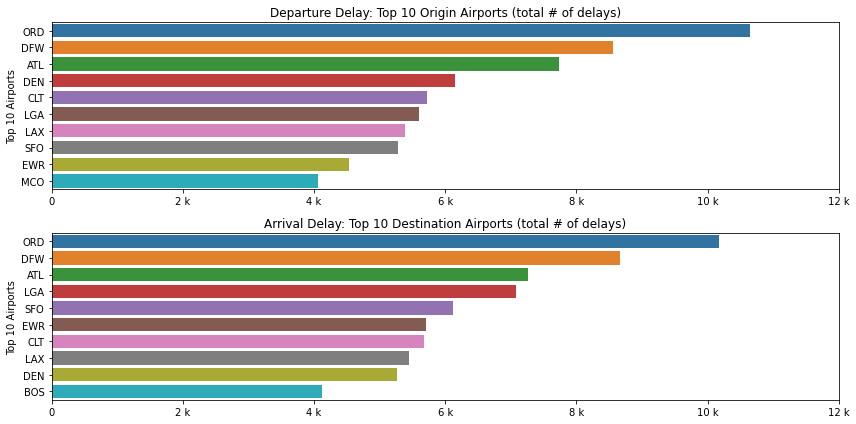

In [19]:
fig, axs = plt.subplots(2,1, figsize= (12,6))

dest = sns.barplot(y= dep_del_origin.index, x= dep_del_origin, orient= "h", ax= axs[0])
dest.set(xlim = (0,12000))
dest.xaxis.set_major_formatter(ticker.EngFormatter())
dest.set_title("Departure Delay: Top 10 Origin Airports (total # of delays)")
dest.set_xlabel("")
dest.set_ylabel("Top 10 Airports")

origin = sns.barplot(y= arr_del_dest.index, x= arr_del_dest, orient= "h", ax= axs[1])
origin.set(xlim = (0,12000))
origin.xaxis.set_major_formatter(ticker.EngFormatter())
origin.set_title("Arrival Delay: Top 10 Destination Airports (total # of delays)")
origin.set_xlabel("")
origin.set_ylabel("Top 10 Airports")

plt.tight_layout()

In [20]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019


In [21]:
domcount_2019 = arr_del[arr_del["year"] == "2019"]["DAY_OF_MONTH"].value_counts()
domcount_2020 = arr_del[arr_del["year"] == "2020"]["DAY_OF_MONTH"].value_counts()

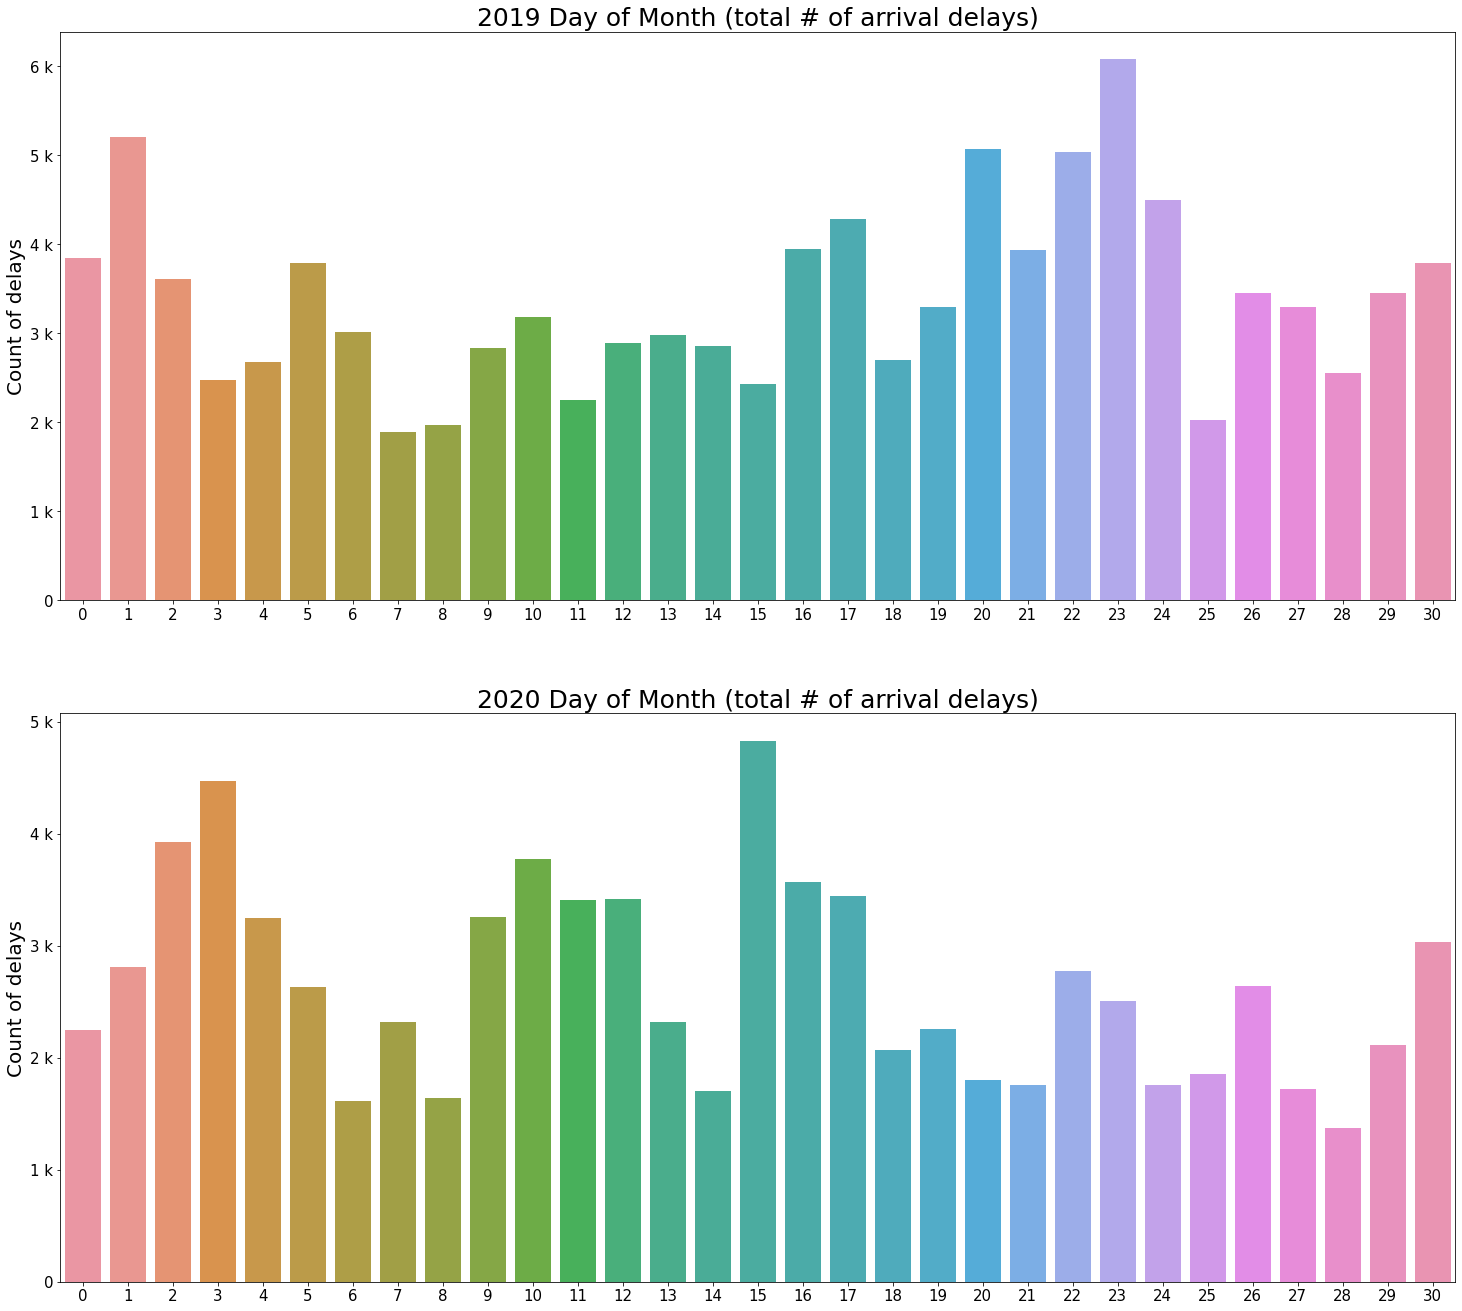

In [22]:
fig, axs = plt.subplots(2,1, figsize= (25,23))

domgraph2019 = sns.barplot(x= domcount_2019.index, y= domcount_2019, ax= axs[0])
domgraph2019.set_title("2019 Day of Month (total # of arrival delays)", fontsize=25)
domgraph2019.set_ylabel("Count of delays", fontsize=20)
domgraph2019.set_xticklabels(domgraph2019.get_xticks(), size= 15)
domgraph2019.set_yticklabels(domgraph2019.get_yticks(), size= 15)
domgraph2019.yaxis.set_major_formatter(ticker.EngFormatter())

domgraph2020 = sns.barplot(x= domcount_2020.index, y= domcount_2020, ax= axs[1])
domgraph2020.set_title("2020 Day of Month (total # of arrival delays)", fontsize=25)
domgraph2020.set_ylabel("Count of delays", fontsize=20)
domgraph2020.set_xticklabels(domgraph2020.get_xticks(), size= 15)
domgraph2020.set_yticklabels(domgraph2020.get_yticks(), size= 15)
domgraph2020.yaxis.set_major_formatter(ticker.EngFormatter())

In [23]:
dowcount_2019 = arr_del[arr_del["year"] == "2019"]["DAY_OF_WEEK"].value_counts()
dowcount_2020 = arr_del[arr_del["year"] == "2020"]["DAY_OF_WEEK"].value_counts()

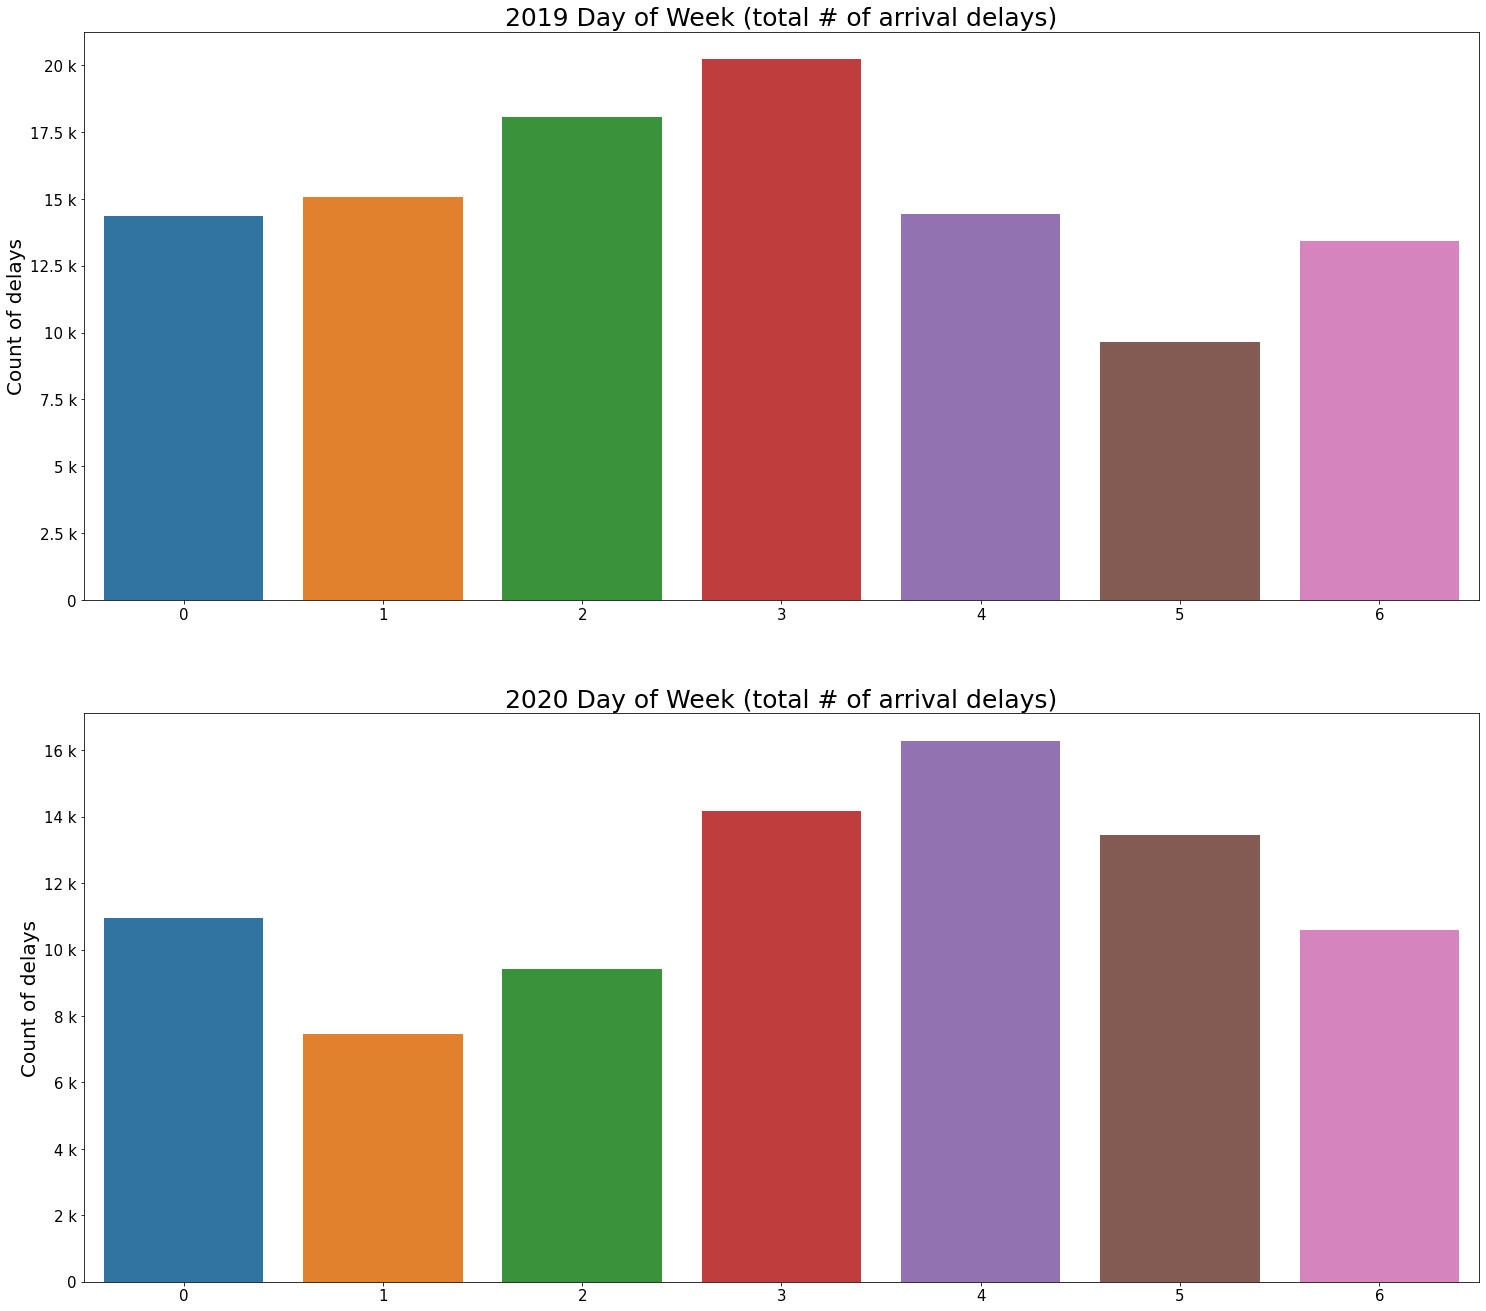

In [24]:
fig, axs = plt.subplots(2,1, figsize= (25,23))

dowgraph2019 = sns.barplot(x= dowcount_2019.index, y= dowcount_2019, ax= axs[0])
dowgraph2019.set_title("2019 Day of Week (total # of arrival delays)", fontsize=25)
dowgraph2019.set_ylabel("Count of delays", fontsize=20)
dowgraph2019.set_xticklabels(dowgraph2019.get_xticks(), size= 15)
dowgraph2019.set_yticklabels(dowgraph2019.get_yticks(), size= 15)
dowgraph2019.yaxis.set_major_formatter(ticker.EngFormatter())

dowgraph2020 = sns.barplot(x= dowcount_2020.index, y= dowcount_2020, ax= axs[1])
dowgraph2020.set_title("2020 Day of Week (total # of arrival delays)", fontsize=25)
dowgraph2020.set_ylabel("Count of delays", fontsize=20)
dowgraph2020.set_xticklabels(dowgraph2020.get_xticks(), size= 15)
dowgraph2020.set_yticklabels(dowgraph2020.get_yticks(), size= 15)
dowgraph2020.yaxis.set_major_formatter(ticker.EngFormatter())

In [25]:
flight_count = df["year"].value_counts()

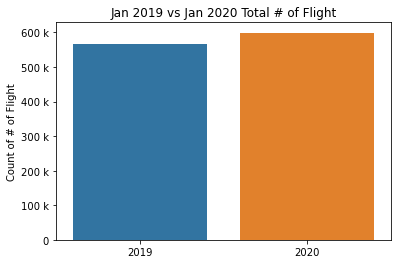

In [26]:
flight_countbar = sns.barplot(x= flight_count.index, y= flight_count)
flight_countbar.set_title("Jan 2019 vs Jan 2020 Total # of Flight")
flight_countbar.set_ylabel("Count of # of Flight")
flight_countbar.yaxis.set_major_formatter(ticker.EngFormatter())

In [27]:
df_delayed = df_2020[(df_2020["ARR_DEL15"] == 1) | (df_2020["DEP_DEL15"] == 1)]
df_delayed2019 = df_2019[(df_2019["ARR_DEL15"] == 1) | (df_2019["DEP_DEL15"] == 1)]

In [28]:
top10carrier = df_delayed["OP_CARRIER"].value_counts()[:10]
top10carrier2019 = df_delayed2019["OP_CARRIER"].value_counts()[:10]

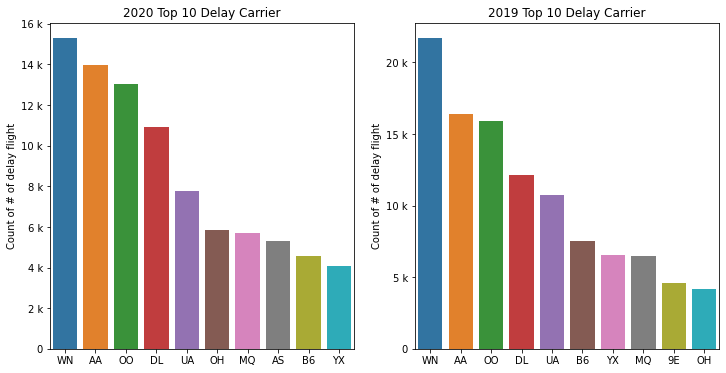

In [29]:
fig, axs = plt.subplots(1,2, figsize= (12,6))

top10carrierbar2020 = sns.barplot(x= top10carrier.index, y= top10carrier, ax= axs[0])
top10carrierbar2020.set_title("2020 Top 10 Delay Carrier")
top10carrierbar2020.set_ylabel("Count of # of delay flight")
top10carrierbar2020.yaxis.set_major_formatter(ticker.EngFormatter())

top10carrierbar2019 = sns.barplot(x= top10carrier2019.index, y= top10carrier2019, ax= axs[1])
top10carrierbar2019.set_title("2019 Top 10 Delay Carrier")
top10carrierbar2019.set_ylabel("Count of # of delay flight")
top10carrierbar2019.yaxis.set_major_formatter(ticker.EngFormatter())

***
## Model Building

In [30]:
df.dtypes

DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_CARRIER            object
OP_CARRIER_FL_NUM      int64
ORIGIN                object
DEST                  object
DEP_TIME             float64
DEP_DEL15            float64
DEP_TIME_BLK          object
ARR_TIME             float64
ARR_DEL15            float64
CANCELLED            float64
DIVERTED             float64
DISTANCE             float64
year                  object
dtype: object

In [31]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
0,1,2,9E,3280,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019
1,1,2,9E,3281,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019
2,1,2,9E,3282,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019
3,1,2,9E,3283,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019
4,1,2,9E,3284,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019


In [32]:
#functions for converting time to time blk
def arrtimeblk(x):
    if x >= 600 and x <= 659:
        return '0600-0659'
    elif x>=1400 and x<=1459:
        return '1400-1459'
    elif x>=1200 and x<=1259:
        return '1200-1259'
    elif x>=1500 and x<=1559:
        return '1500-1559'
    elif x>=1900 and x<=1959:
        return '1900-1959'
    elif x>=900 and x<=959:
        return '0900-0959'
    elif x>=1000 and x<=1059:
        return  '1000-1059'
    elif x>=2000 and x<=2059:
        return '2000-2059'
    elif x>=1300 and x<=1359:
        return '1300-1359'
    elif x>=1100 and x<=1159:
        return '1100-1159'
    elif x>=800 and x<=859:
        return '0800-0859'
    elif x>=2200 and x<=2259:
        return '2200-2259'
    elif x>=1600 and x<=1659:
        return '1600-1659'
    elif x>=1700 and x<=1759:
        return '1700-1759'
    elif x>=2100 and x<=2159:
        return '2100-2159'
    elif x>=700 and x<=759:
        return '0700-0759'
    elif x>=1800 and x<=1859:
        return '1800-1859'
    elif x>=1 and x<=559:
        return '0001-0559'
    elif x>=2300 and x<=2400:
        return '2300-2400'

In [33]:
df["ARR_TIME_BLK"] = df["ARR_TIME"].apply(arrtimeblk)

In [34]:
df.dtypes

DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_CARRIER            object
OP_CARRIER_FL_NUM      int64
ORIGIN                object
DEST                  object
DEP_TIME             float64
DEP_DEL15            float64
DEP_TIME_BLK          object
ARR_TIME             float64
ARR_DEL15            float64
CANCELLED            float64
DIVERTED             float64
DISTANCE             float64
year                  object
ARR_TIME_BLK          object
dtype: object

In [35]:
# drop irrelevant and unmodified columns to increase efficiency 
dfmodel = df.drop(["DEP_TIME", "ARR_TIME", "CANCELLED", "DIVERTED", "OP_CARRIER"], axis= 1)

In [36]:
dfmodel.dtypes

DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_CARRIER_FL_NUM      int64
ORIGIN                object
DEST                  object
DEP_DEL15            float64
DEP_TIME_BLK          object
ARR_DEL15            float64
DISTANCE             float64
year                  object
ARR_TIME_BLK          object
dtype: object

In [37]:
dfmodel = dfmodel.astype({
    "ORIGIN":"category",
    "DEST":"category",
    "DEP_TIME_BLK":"category",
    "ARR_TIME_BLK":"category",
    "year":"int64",
    "DEP_DEL15":"int64",
    "ARR_DEL15":"int64"
})

In [38]:
dfmodel.dtypes

DAY_OF_MONTH            int64
DAY_OF_WEEK             int64
OP_CARRIER_FL_NUM       int64
ORIGIN               category
DEST                 category
DEP_DEL15               int64
DEP_TIME_BLK         category
ARR_DEL15               int64
DISTANCE              float64
year                    int64
ARR_TIME_BLK         category
dtype: object

In [39]:
#Due to the computing power limit, I only use data from 2020 to train and test the model. 
dfmodel = pd.get_dummies(dfmodel)
dfmodel = dfmodel[dfmodel["year"] == 2020]

In [40]:
X = dfmodel.drop("ARR_DEL15", axis= 1)
y = dfmodel["ARR_DEL15"]

In [41]:
X.dtypes

DAY_OF_MONTH                int64
DAY_OF_WEEK                 int64
OP_CARRIER_FL_NUM           int64
DEP_DEL15                   int64
DISTANCE                  float64
                           ...   
ARR_TIME_BLK_1900-1959      uint8
ARR_TIME_BLK_2000-2059      uint8
ARR_TIME_BLK_2100-2159      uint8
ARR_TIME_BLK_2200-2259      uint8
ARR_TIME_BLK_2300-2400      uint8
Length: 750, dtype: object

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y)

In [43]:
dfmodel

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,DEP_DEL15,ARR_DEL15,DISTANCE,year,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,...,ARR_TIME_BLK_1400-1459,ARR_TIME_BLK_1500-1559,ARR_TIME_BLK_1600-1659,ARR_TIME_BLK_1700-1759,ARR_TIME_BLK_1800-1859,ARR_TIME_BLK_1900-1959,ARR_TIME_BLK_2000-2059,ARR_TIME_BLK_2100-2159,ARR_TIME_BLK_2200-2259,ARR_TIME_BLK_2300-2400
583985,1,3,4397,0,0,174.0,2020,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583986,1,3,4401,0,0,585.0,2020,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583987,1,3,4404,0,0,631.0,2020,0,0,0,...,0,0,0,0,0,0,0,1,0,0
583988,1,3,4405,0,0,253.0,2020,0,0,0,...,0,0,0,0,0,0,1,0,0,0
583989,1,3,4407,0,0,1157.0,2020,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191326,31,5,4812,1,1,443.0,2020,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191327,31,5,4813,0,0,509.0,2020,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1191328,31,5,4814,0,0,610.0,2020,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191329,31,5,4815,0,0,589.0,2020,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Decision Tree

In [79]:
dtc = DecisionTreeClassifier()

In [46]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
ypreddtc = dtc.predict(X_test)
print(accuracy_score(ypreddtc, y_test))
print(f1_score(ypreddtc, y_test))

0.9006466506756148
0.6894081665504104


In [81]:
parameters = {
    "criterion":("gini", "entropy"),
    "max_features":("auto", "sqrt", "log2"),
    'min_samples_split': range(2, 403, 10)
}

In [85]:
gsdtc = RandomizedSearchCV(dtc, parameters, scoring= "f1")

In [86]:
gsdtc.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': range(2, 403, 10)},
                   scoring='f1')

In [87]:
gsdtc.best_score_

0.7012670625879901

After tuning the hyperparameters of Decision Tree Classifier, we get a f1 score of 0.70.

Random Forest

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
ypredrf = rf.predict(X_test)
print(accuracy_score(ypredrf, y_test))
print(f1_score(ypredrf, y_test))

0.9368398217831695
0.7574339912842861


In [93]:
parameters = {
    "n_estimators":range(10,200,10),
    "criterion":("gini", "entropy"),
    "max_features":("auto", "sqrt", "log2")
}

In [94]:
gsrf = RandomizedSearchCV(rf, parameters, scoring= "f1")

In [95]:
gsrf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'n_estimators': range(10, 200, 10)},
                   scoring='f1')

In [124]:
gsrf.best_score_

0.7536724356866354

Surprisingly, the best estimator performed worse than default setting. But I did not re-tune the parameters since running the RandomizedSearchCV on this huge dataset is extremely time consuming.